# CNC Mill Tool Wear
- https://www.kaggle.com/shasun/tool-wear-detection-in-cnc-mill
- Predict "Machining_Process"

## Setup

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [5]:
import os
path_parent = os.path.dirname(os.getcwd())
saveFolder = os.path.join(path_parent, 'Topic 02-2 - CNC Data', 'Lecture', 'Data_CNC_Processed')
print(saveFolder)
#saveFolder = '..\Topic 02 - Classification\Data_CNC_Processed'
filename = 'pred_machining_process'
compression = 'gzip'
df = pd.read_pickle(f'{saveFolder}/{filename}.pkl',compression=compression)
df.head(3)

c:\Users\nnnpo\Coding\class\ai-class-2565-1\Topic 02-2 - CNC Data\Lecture\Data_CNC_Processed


,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,7,6,4.0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,7,6,4.0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,7,6,4.0


# Transform X with variance selector

In [6]:
from sklearn.feature_selection import VarianceThreshold

colsX = np.array([item for item in df.columns if item not in 'Machining_Process'])
X = df[colsX].values
y = df['Machining_Process'].values

# Creating object
sel = VarianceThreshold(threshold=0)

# Fitting
sel.fit(X)

# Boolean
sup = sel.get_support()
cols_sel = colsX[sup]
print(f'Chosen columns:')
print('-'*30)
print(*cols_sel, sep=', ')

cols_rem = colsX[np.logical_not(sup)]
print(f'\nRemoved columns:')
print('-'*30)
print(*cols_rem, sep=', ')

X = sel.transform(X)
dfX = pd.DataFrame(data=X, columns=cols_sel)
dfX.head()

Chosen columns:
------------------------------
X1_ActualPosition, X1_ActualVelocity, X1_ActualAcceleration, X1_CommandPosition, X1_CommandVelocity, X1_CommandAcceleration, X1_CurrentFeedback, X1_DCBusVoltage, X1_OutputCurrent, X1_OutputVoltage, X1_OutputPower, Y1_ActualPosition, Y1_ActualVelocity, Y1_ActualAcceleration, Y1_CommandPosition, Y1_CommandVelocity, Y1_CommandAcceleration, Y1_CurrentFeedback, Y1_DCBusVoltage, Y1_OutputCurrent, Y1_OutputVoltage, Y1_OutputPower, Z1_ActualPosition, Z1_ActualVelocity, Z1_ActualAcceleration, Z1_CommandPosition, Z1_CommandVelocity, Z1_CommandAcceleration, S1_ActualPosition, S1_ActualVelocity, S1_ActualAcceleration, S1_CommandPosition, S1_CommandVelocity, S1_CommandAcceleration, S1_CurrentFeedback, S1_DCBusVoltage, S1_OutputCurrent, S1_OutputVoltage, S1_OutputPower, M1_CURRENT_PROGRAM_NUMBER, M1_sequence_number, M1_CURRENT_FEEDRATE, feedrate, clamp_pressure

Removed columns:
------------------------------
Z1_CurrentFeedback, Z1_DCBusVoltage, Z1_Outp

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,feedrate,clamp_pressure
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.524,2.740000e-19,329.0,0.0,6.960000e-07,1.0,0.0,50.0,6.0,4.0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,1.0,4.0,50.0,6.0,4.0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,0.524,2.740000e-19,328.0,0.0,9.100000e-07,1.0,7.0,50.0,6.0,4.0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,1.0,7.0,50.0,6.0,4.0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,0.226,2.740000e-19,328.0,0.0,1.960000e-06,1.0,7.0,50.0,6.0,4.0


## Visualization

In [7]:
X_std = StandardScaler().fit_transform(X)

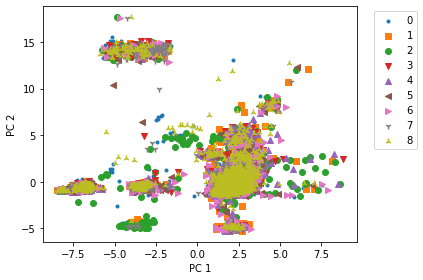

In [8]:
import seaborn as sns

X_std_pca = PCA(n_components=2).fit_transform(X_std)

n_cols = np.unique(y).shape[0]
colors = np.array(sns.color_palette(n_colors=n_cols))
markers=['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
markers = markers[:n_cols]

fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_pca[y == l, 0], X_std_pca[y == l, 1], color=c, label=l, marker=m)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.show()

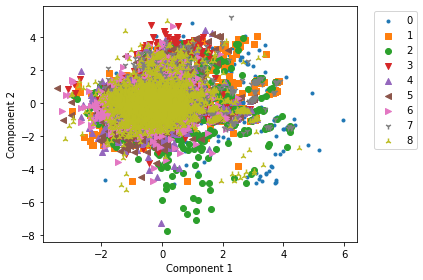

In [9]:
X_std_lda = LDA(n_components=2).fit_transform(X_std, y)

fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_lda[y == l, 0], X_std_lda[y == l, 1], color=c, label=l, marker=m)
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.show()

### Explained variance ratio

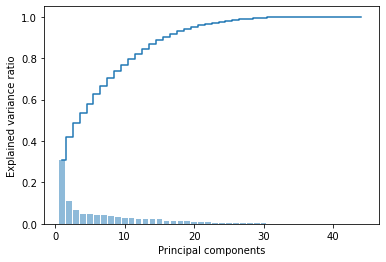

In [10]:
pca = PCA(n_components=44).fit(X_std)

plt.bar(range(1, pca.n_components+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, pca.n_components+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

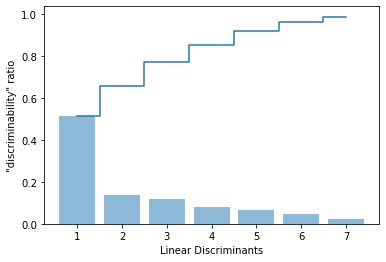

In [11]:
lda = LDA(n_components=7).fit(X_std, y)

plt.bar(range(1, 8), lda.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 8), np.cumsum(lda.explained_variance_ratio_), where='mid')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.show()

## Training with classifier

In [12]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

paramSetAll = {
    "lr": {"clf": LR, "solver": "liblinear", "C": 10000, "max_iter": 100},
    "knn": {"clf":KNN, "n_neighbors": 5, "p": 1, "algorithm": "auto",},
    "dt": {"clf":DT, "criterion": "gini", "max_depth": 100},
    "rf": {"clf": RF,
        "criterion": "gini",
        "n_estimators": 50,
        "max_samples": None,
        "max_features": "auto",
        "max_depth": None,
    },
}

In [13]:
def training(X_train, y_train, X_test, y_test):

    for name, paramsSet in paramSetAll.items():

        clf = paramsSet['clf']
        params = { k:v for k, v in paramsSet.items() if k != 'clf' }

        #clf = LogisticRegression()
        clf = clf(**params)

        # Training
        clf.fit(X_train, y_train)

        # Accuracy scores
        y_pred = clf.predict(X_train)
        acc_train = accuracy_score(y_train, y_pred)

        y_pred = clf.predict(X_test)
        acc_test = accuracy_score(y_test, y_pred)

        print(f'Classifier: {name:5s}, Train Acc: {acc_train:4.2f}, Test Acc: {acc_test:4.2f}')
    print(f"--------------------------------------------------")

In [14]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardize
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std.shape)

(17700, 44)


In [15]:
# No transformation
training(X_train_std, y_train, X_test_std, y_test)

Classifier: lr   , Train Acc: 0.20, Test Acc: 0.19
Classifier: knn  , Train Acc: 0.66, Test Acc: 0.45
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.63
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.69
--------------------------------------------------


In [16]:
for n_components in [15, 20, 25, 30]:
    print(f'Number of components: {n_components}')
    pca = PCA(n_components=n_components)
    X_train_std_trans = pca.fit_transform(X_train_std)
    X_test_std_trans = pca.transform(X_test_std)
    training(X_train_std_trans, y_train, X_test_std_trans, y_test)

Number of components: 15
Classifier: lr   , Train Acc: 0.17, Test Acc: 0.17
Classifier: knn  , Train Acc: 0.57, Test Acc: 0.34
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.29
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.38
--------------------------------------------------
Number of components: 20
Classifier: lr   , Train Acc: 0.18, Test Acc: 0.18
Classifier: knn  , Train Acc: 0.59, Test Acc: 0.37
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.30
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.40
--------------------------------------------------
Number of components: 25
Classifier: lr   , Train Acc: 0.20, Test Acc: 0.20
Classifier: knn  , Train Acc: 0.59, Test Acc: 0.38
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.30
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.41
--------------------------------------------------
Number of components: 30
Classifier: lr   , Train Acc: 0.20, Test Acc: 0.19
Classifier: knn  , Train Acc: 0.60, Test Acc: 0.39
Classifier: dt   , Train Acc: 1.0

In [17]:
for n_components in range(2,8):
    print(f'Number of components: {n_components}')
    lda = LDA(n_components=n_components)
    X_train_std_trans = lda.fit_transform(X_train_std, y_train)
    X_test_std_trans = lda.transform(X_test_std)
    training(X_train_std_trans, y_train, X_test_std_trans, y_test)

Number of components: 2
Classifier: lr   , Train Acc: 0.18, Test Acc: 0.18
Classifier: knn  , Train Acc: 0.42, Test Acc: 0.16
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.16
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.17
--------------------------------------------------
Number of components: 3
Classifier: lr   , Train Acc: 0.18, Test Acc: 0.18
Classifier: knn  , Train Acc: 0.43, Test Acc: 0.19
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.18
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.19
--------------------------------------------------
Number of components: 4
Classifier: lr   , Train Acc: 0.19, Test Acc: 0.19
Classifier: knn  , Train Acc: 0.45, Test Acc: 0.20
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.19
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.22
--------------------------------------------------
Number of components: 5
Classifier: lr   , Train Acc: 0.19, Test Acc: 0.20
Classifier: knn  , Train Acc: 0.48, Test Acc: 0.23
Classifier: dt   , Train Acc: 1.00, T

### Discussion for worse accuracy
- I think that to be fair I should re optimize the parameters for the dimensional reduction case.
- Also, maybe the data is not too bad at the beginning.
- Sometime, the data is too big to calculate and PCA is necessary.